<a href="https://www.kaggle.com/code/nguyenthien3001/student-dropout-analysis?scriptVersionId=198773111" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import neccessary library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('/kaggle/input/student-dropout-analysis-and-prediction-dataset/student dropout.csv')
df.sample(10)

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
201,GP,M,16,U,LE3,T,2,1,other,other,course,mother,1,2,0,no,no,no,yes,yes,yes,yes,yes,4,2,3,1,2,5,0,13,14,16,False
464,MS,M,16,R,GT3,T,1,1,at_home,other,other,father,2,1,0,no,no,no,yes,yes,yes,no,no,3,4,4,3,4,5,6,11,11,11,False
305,GP,M,17,U,GT3,T,2,2,other,other,home,father,2,1,0,no,no,no,no,yes,no,yes,no,4,4,4,2,3,4,8,8,8,9,True
417,GP,F,18,U,GT3,T,3,2,at_home,other,reputation,father,1,3,0,no,yes,no,no,yes,yes,yes,yes,4,3,4,1,2,2,5,14,17,17,False
492,MS,F,16,R,GT3,A,2,2,health,other,course,mother,1,2,0,no,no,no,no,no,yes,no,yes,3,3,2,1,1,3,2,8,10,10,False
569,MS,M,18,U,GT3,T,3,3,at_home,at_home,course,mother,1,2,2,no,yes,no,yes,yes,no,yes,no,4,4,5,1,3,3,9,4,8,8,True
270,GP,M,16,U,GT3,T,4,4,services,services,course,mother,1,1,0,no,no,yes,yes,yes,yes,yes,no,5,3,2,1,2,5,4,14,15,15,False
468,MS,M,15,U,GT3,T,2,2,health,other,reputation,mother,3,1,0,no,no,no,no,yes,yes,no,no,4,3,3,1,2,4,1,13,12,13,False
105,GP,F,15,U,GT3,A,3,3,other,health,reputation,father,1,4,0,yes,no,no,no,yes,yes,no,no,4,3,3,1,1,4,10,10,10,10,False
326,GP,M,17,U,LE3,A,3,2,teacher,services,home,mother,1,1,0,no,no,no,no,yes,yes,yes,no,4,4,4,3,4,3,18,13,13,13,False


# Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Mother_Education,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Father_Education,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
Travel_Time,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
Study_Time,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
Number_of_Failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
Family_Relationship,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
Free_Time,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
Going_Out,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Weekend_Alcohol_Consumption,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [5]:
df.describe(include ='O').T

,count,unique,top,freq
School,649,2,GP,423
Gender,649,2,F,383
Address,649,2,U,452
Family_Size,649,2,GT3,457
Parental_Status,649,2,T,569
Mother_Job,649,5,other,258
Father_Job,649,5,other,367
Reason_for_Choosing_School,649,4,course,285
Guardian,649,3,mother,455
School_Support,649,2,no,581


In [6]:
df.describe(include ='O').T

,count,unique,top,freq
School,649,2,GP,423
Gender,649,2,F,383
Address,649,2,U,452
Family_Size,649,2,GT3,457
Parental_Status,649,2,T,569
Mother_Job,649,5,other,258
Father_Job,649,5,other,367
Reason_for_Choosing_School,649,4,course,285
Guardian,649,3,mother,455
School_Support,649,2,no,581


In [7]:
df.isnull().sum()

School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Number_of_Failures             0
School_Support                 0
Family_Support                 0
Extra_Paid_Class               0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
In_Relationship                0
Family_Relationship            0
Free_Time                      0
Going_Out                      0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Health_Status                  0
Number_of_Absences             0
Grade_1   

In [8]:
duplicated_rows=df.duplicated()
quantity = duplicated_rows.sum()
print('Number of duplicate rows:',quantity)

Number of duplicate rows: 0


In [9]:
def columns(dataframe):
    discrete_columns = []
    continuous_columns = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object' or dataframe[column].nunique() <= 10:
            discrete_columns.append(column)
        else:
            continuous_columns.append(column)

    return discrete_columns, continuous_columns

discrete_cols, continuous_cols = columns(df)
print("Discrete columns:\n", discrete_cols)
print("Continuous columns:\n", continuous_cols)


Discrete columns:
 ['School', 'Gender', 'Age', 'Address', 'Family_Size', 'Parental_Status', 'Mother_Education', 'Father_Education', 'Mother_Job', 'Father_Job', 'Reason_for_Choosing_School', 'Guardian', 'Travel_Time', 'Study_Time', 'Number_of_Failures', 'School_Support', 'Family_Support', 'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery', 'Wants_Higher_Education', 'Internet_Access', 'In_Relationship', 'Family_Relationship', 'Free_Time', 'Going_Out', 'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption', 'Health_Status', 'Dropped_Out']
Continuous columns:
 ['Number_of_Absences', 'Grade_1', 'Grade_2', 'Final_Grade']


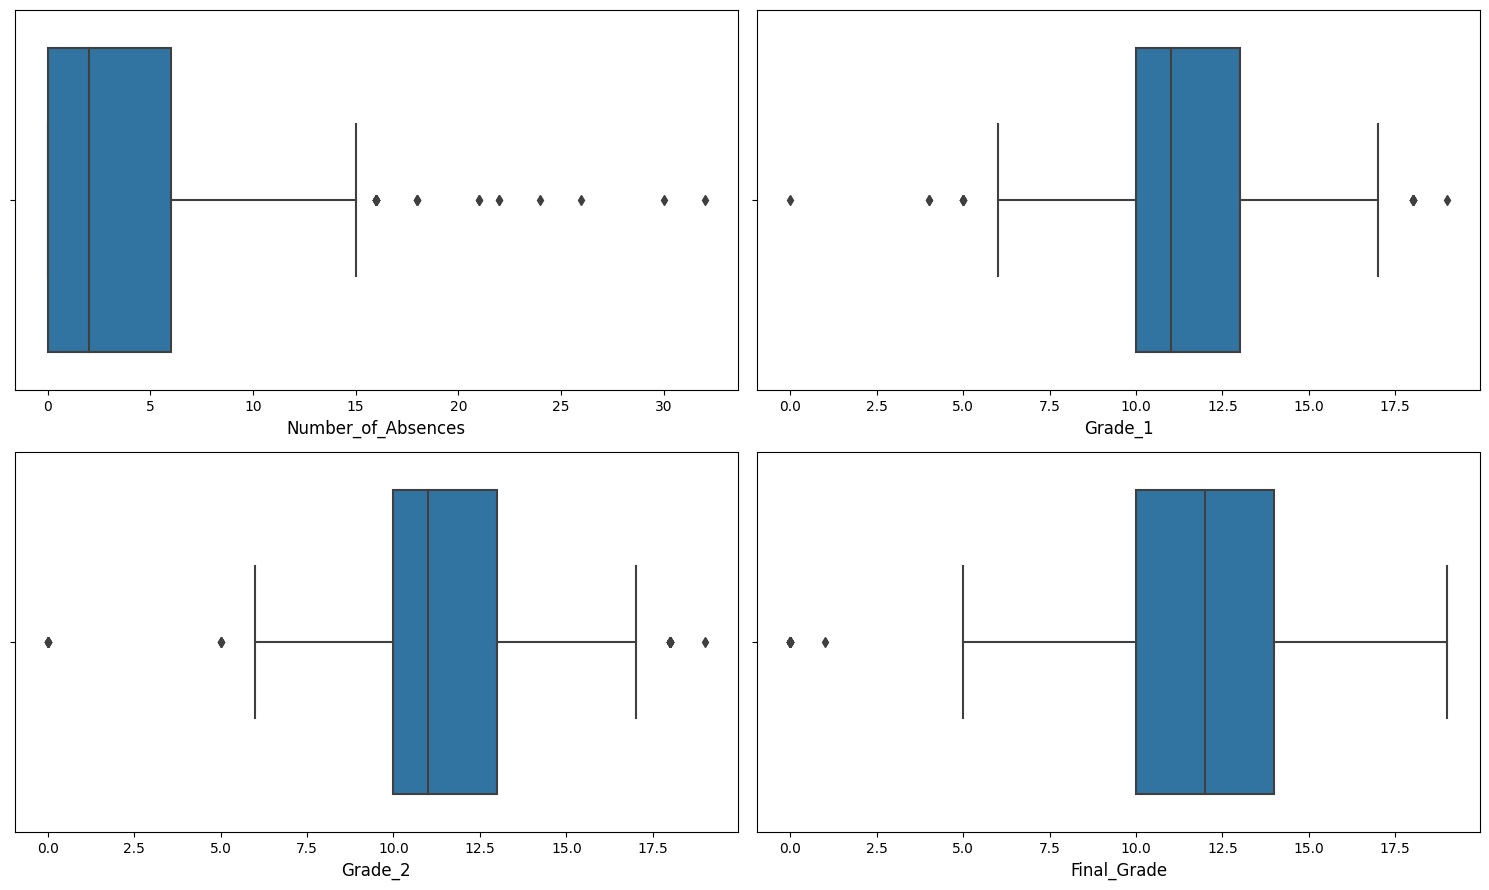

In [10]:
#outliers
total_plots = len(continuous_cols)
columns_per_row = 2
rows = -(-total_plots // columns_per_row)
plt.figure(figsize=(15, 9))

for idx, column in enumerate(continuous_cols, start=1):
    plt.subplot(rows, columns_per_row, idx)
    sns.boxplot(data=df, x=column)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

In [11]:
df[df['Number_of_Absences'] > 0].count()

School                         405
Gender                         405
Age                            405
Address                        405
Family_Size                    405
Parental_Status                405
Mother_Education               405
Father_Education               405
Mother_Job                     405
Father_Job                     405
Reason_for_Choosing_School     405
Guardian                       405
Travel_Time                    405
Study_Time                     405
Number_of_Failures             405
School_Support                 405
Family_Support                 405
Extra_Paid_Class               405
Extra_Curricular_Activities    405
Attended_Nursery               405
Wants_Higher_Education         405
Internet_Access                405
In_Relationship                405
Family_Relationship            405
Free_Time                      405
Going_Out                      405
Weekend_Alcohol_Consumption    405
Weekday_Alcohol_Consumption    405
Health_Status       

In [12]:
def replace_outliers_with_mean(df: pd.DataFrame) -> pd.DataFrame:
    for col_name in continuous_cols:
        # Tính phạm vi liên tứ phân vị (IQR)
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)
        IQR = Q3 - Q1

        # Tính giới hạn dưới và giới hạn trên để thay thế các ngoại lệ
        lower_threshold = Q1 - 1.5 * IQR
        upper_threshold = Q3 + 1.5 * IQR
        cap_lower_bound = Q1 - 3 * IQR
        cap_upper_bound = Q3 + 3 * IQR

        # Xác định các ngoại lệ
        outliers = (df[col_name] < lower_threshold) | (df[col_name] > upper_threshold) | \
                   (df[col_name] < cap_lower_bound) | (df[col_name] > cap_upper_bound)

        # Thay thế các ngoại lệ bằng giá trị trung bình
        df.loc[outliers, col_name] = round(df[col_name].mean())

    return df

df = replace_outliers_with_mean(df)

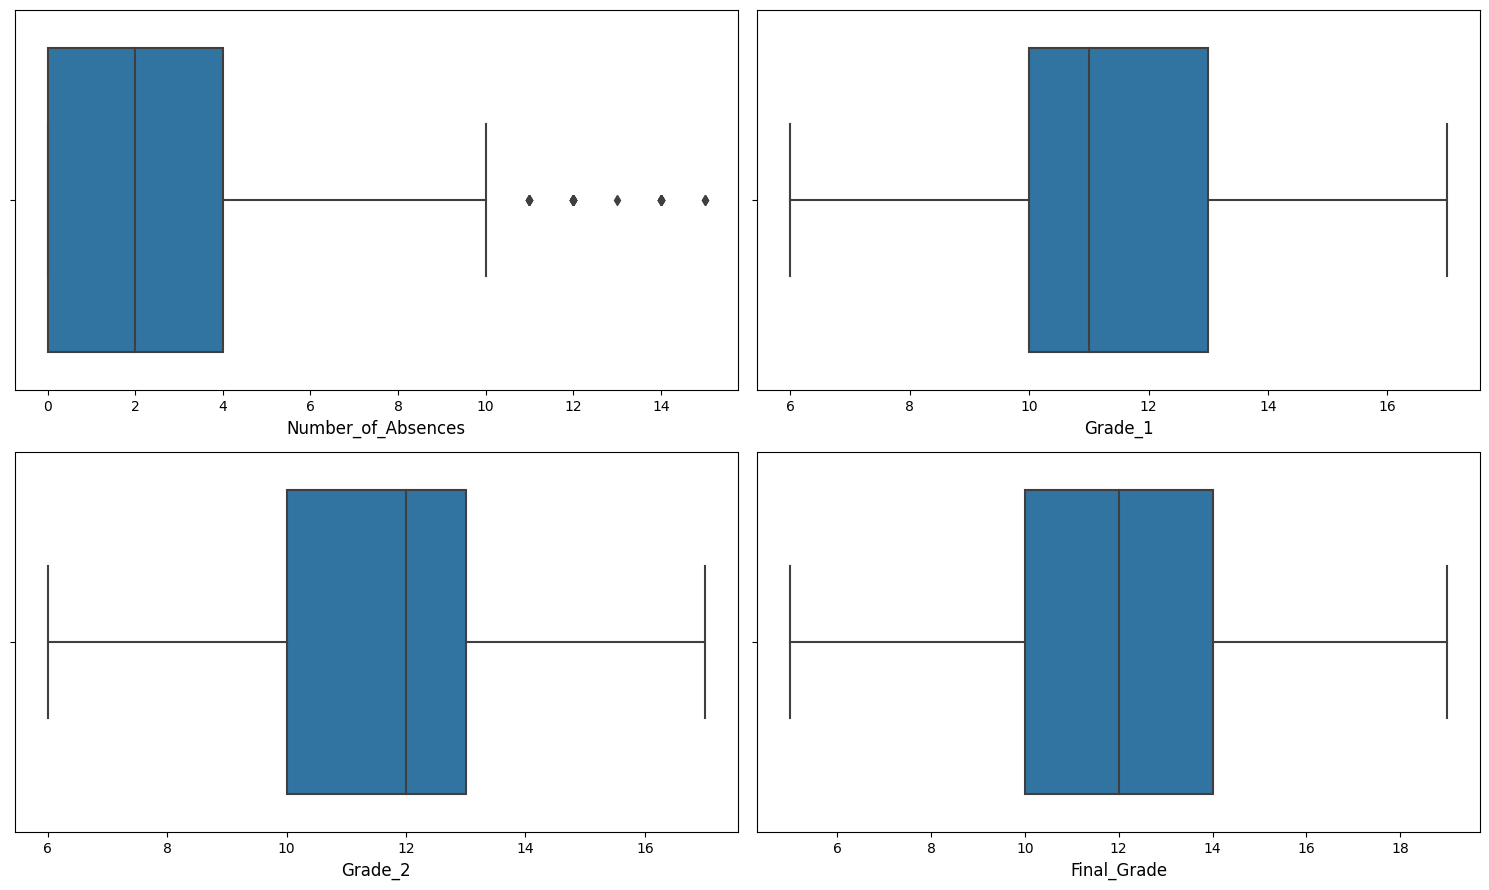

In [13]:
# Vẽ lại box plot
plt.figure(figsize = (15,9))
for idx, column in enumerate(continuous_cols, start=1):
    plt.subplot(rows, columns_per_row, idx)
    sns.boxplot(data=df, x=column)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()


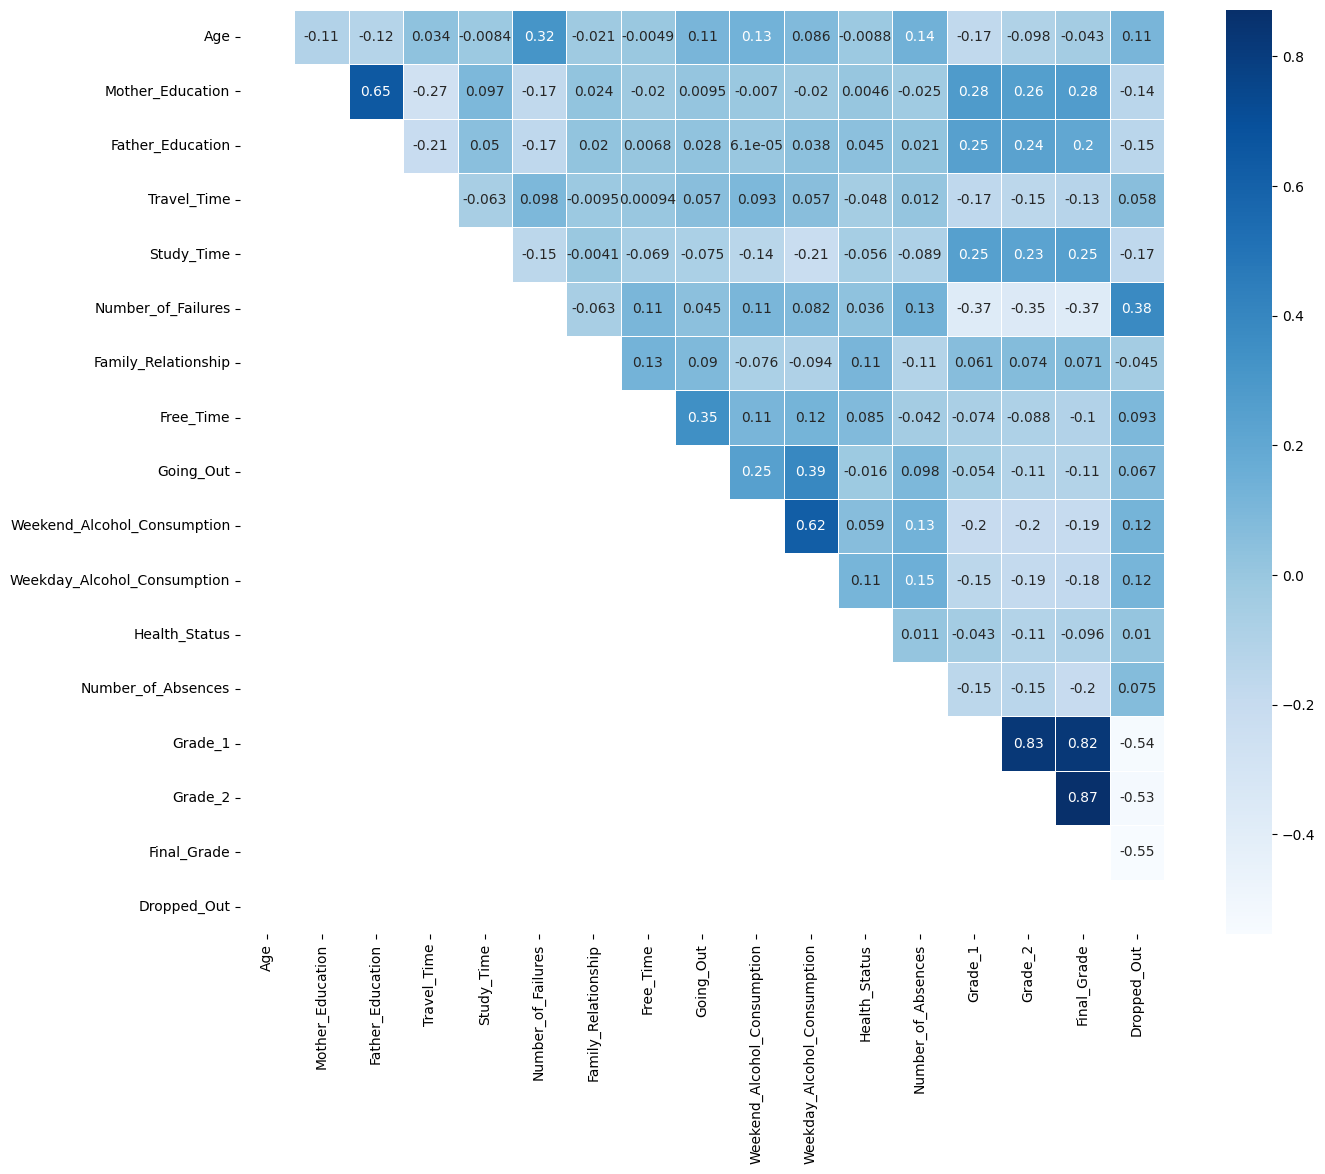

In [14]:
plt.figure(facecolor='w', figsize=(16, 12))
mask = np.tril(df.corr(numeric_only=True))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5, mask=mask, cmap='Blues', square=True)
plt.show()

In [15]:
# Kiểm tra unique value trong các cột categorical
columns = ['School', 'Gender', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Job', 'Father_Job', 'Reason_for_Choosing_School', 'Guardian',
       'School_Support', 'Family_Support', 'Extra_Paid_Class',
       'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship']

for column in columns:
  unique_values = df[column].unique()
  print(f"\n{column}: \n{unique_values}\n")


School: 
['GP' 'MS']


Gender: 
['F' 'M']


Address: 
['U' 'R']


Family_Size: 
['GT3' 'LE3']


Parental_Status: 
['A' 'T']


Mother_Job: 
['at_home' 'health' 'other' 'services' 'teacher']


Father_Job: 
['teacher' 'other' 'services' 'health' 'at_home']


Reason_for_Choosing_School: 
['course' 'other' 'home' 'reputation']


Guardian: 
['mother' 'father' 'other']


School_Support: 
['yes' 'no']


Family_Support: 
['no' 'yes']


Extra_Paid_Class: 
['no' 'yes']


Extra_Curricular_Activities: 
['no' 'yes']


Attended_Nursery: 
['yes' 'no']


Wants_Higher_Education: 
['yes' 'no']


Internet_Access: 
['no' 'yes']


In_Relationship: 
['no' 'yes']



# EDA

## Univariate Analysis (Phân tích đơn biến)

### Categorical

<Axes: xlabel='Dropped_Out', ylabel='count'>

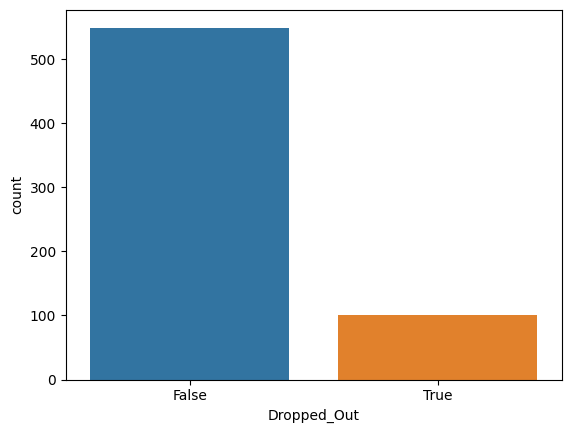

In [16]:
sns.countplot(x='Dropped_Out', data=df)

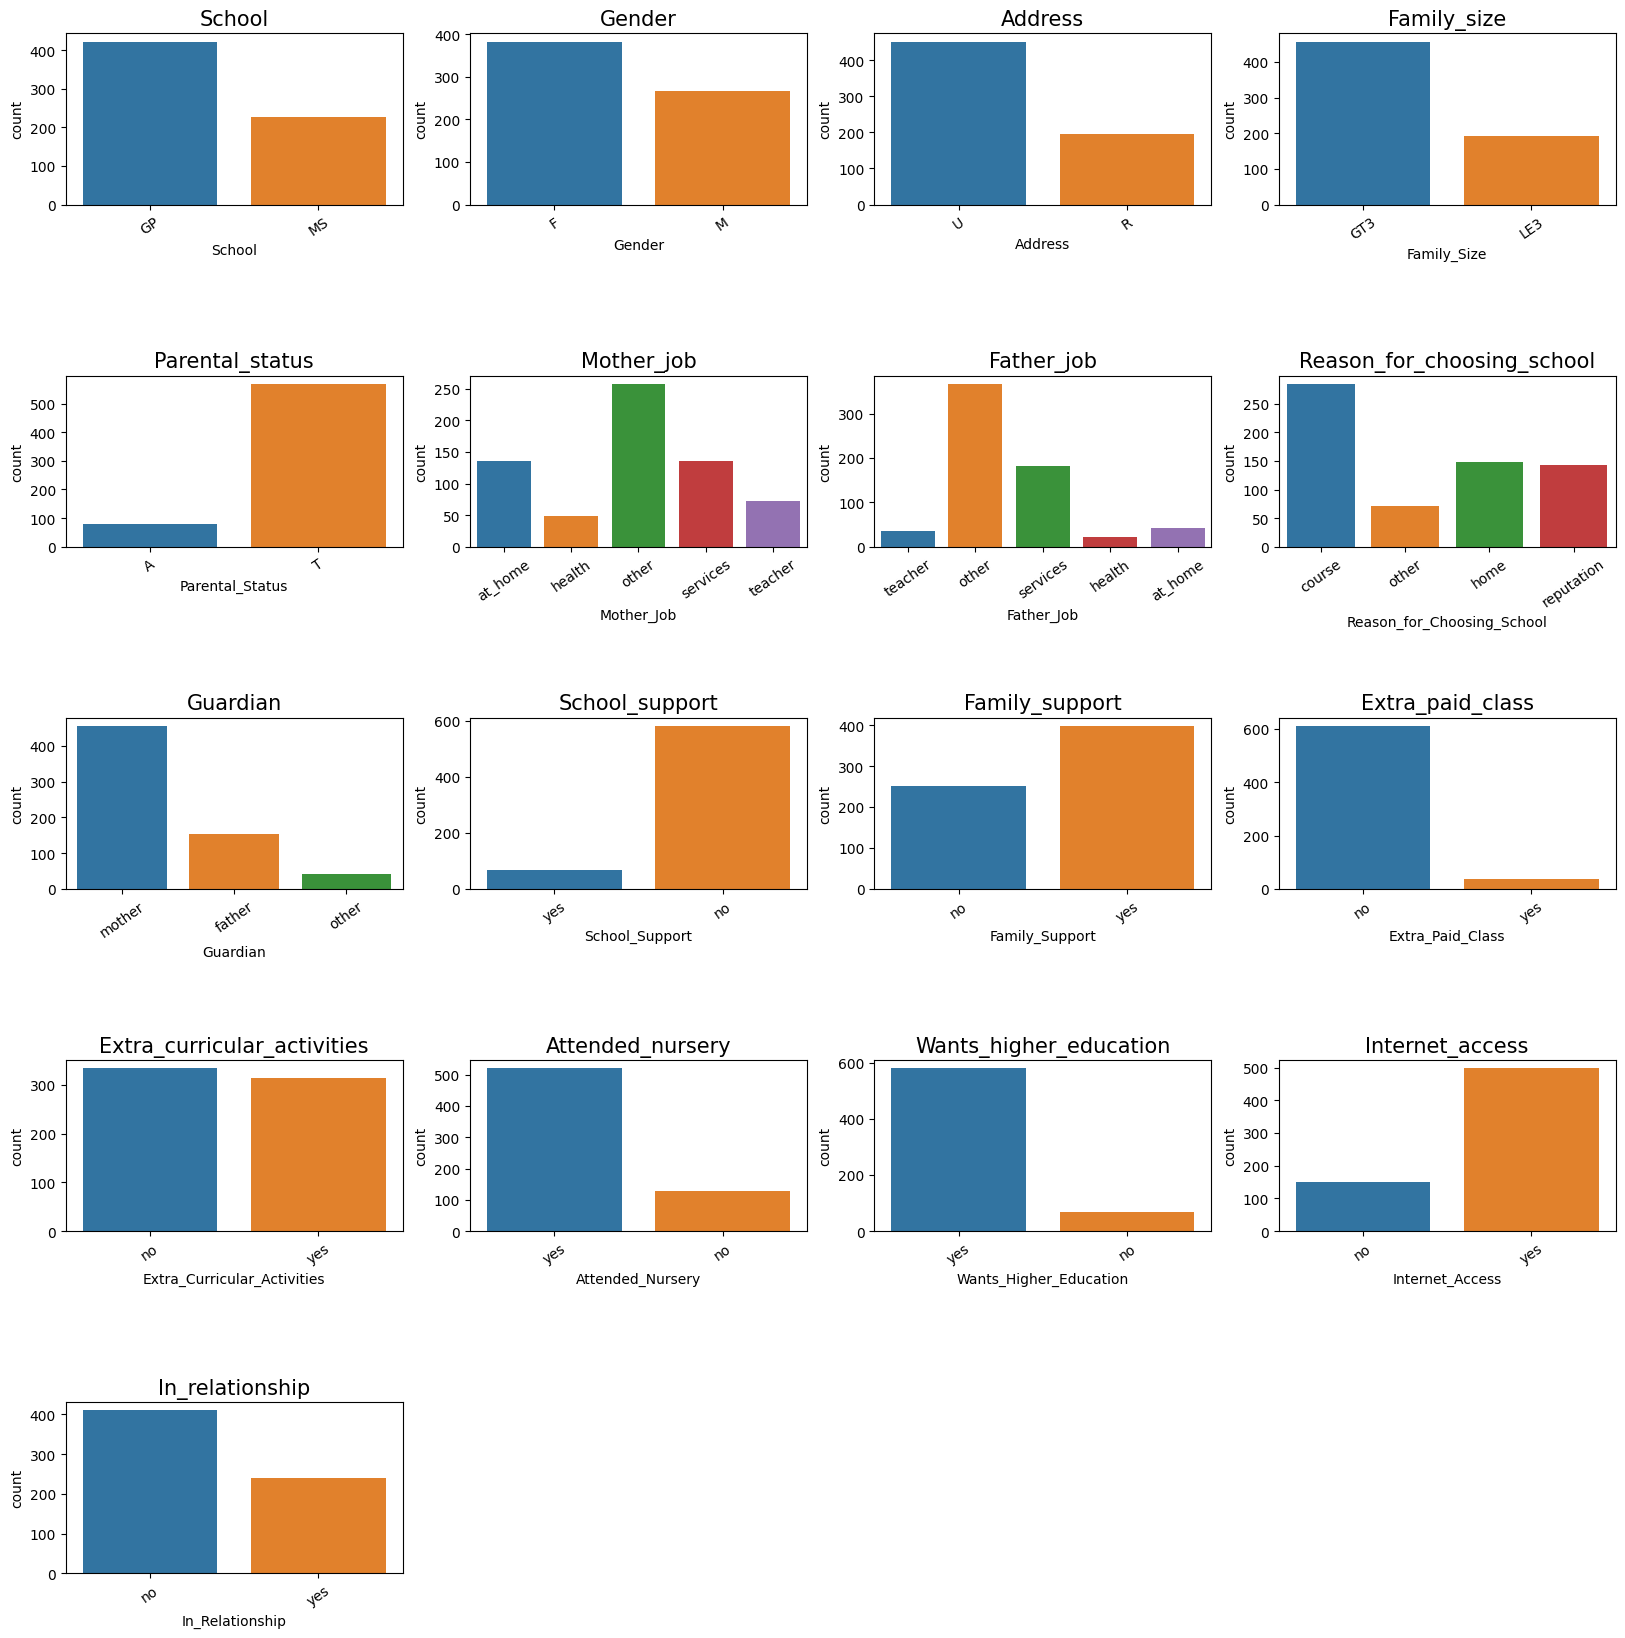

In [17]:
# phân phối các biến categorical
cat_cols = df[['School', 'Gender', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Job', 'Father_Job', 'Reason_for_Choosing_School', 'Guardian',
       'School_Support', 'Family_Support', 'Extra_Paid_Class',
       'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship']]

plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace=1)

for i, col in enumerate(cat_cols, 1):
  plt.subplot(5, 4,i)
  sns.countplot(data = df, x = col)
  plt.title(f'{col.capitalize()}', size = 15)
  plt.xticks(rotation=35)

plt.show()

### Numgerical

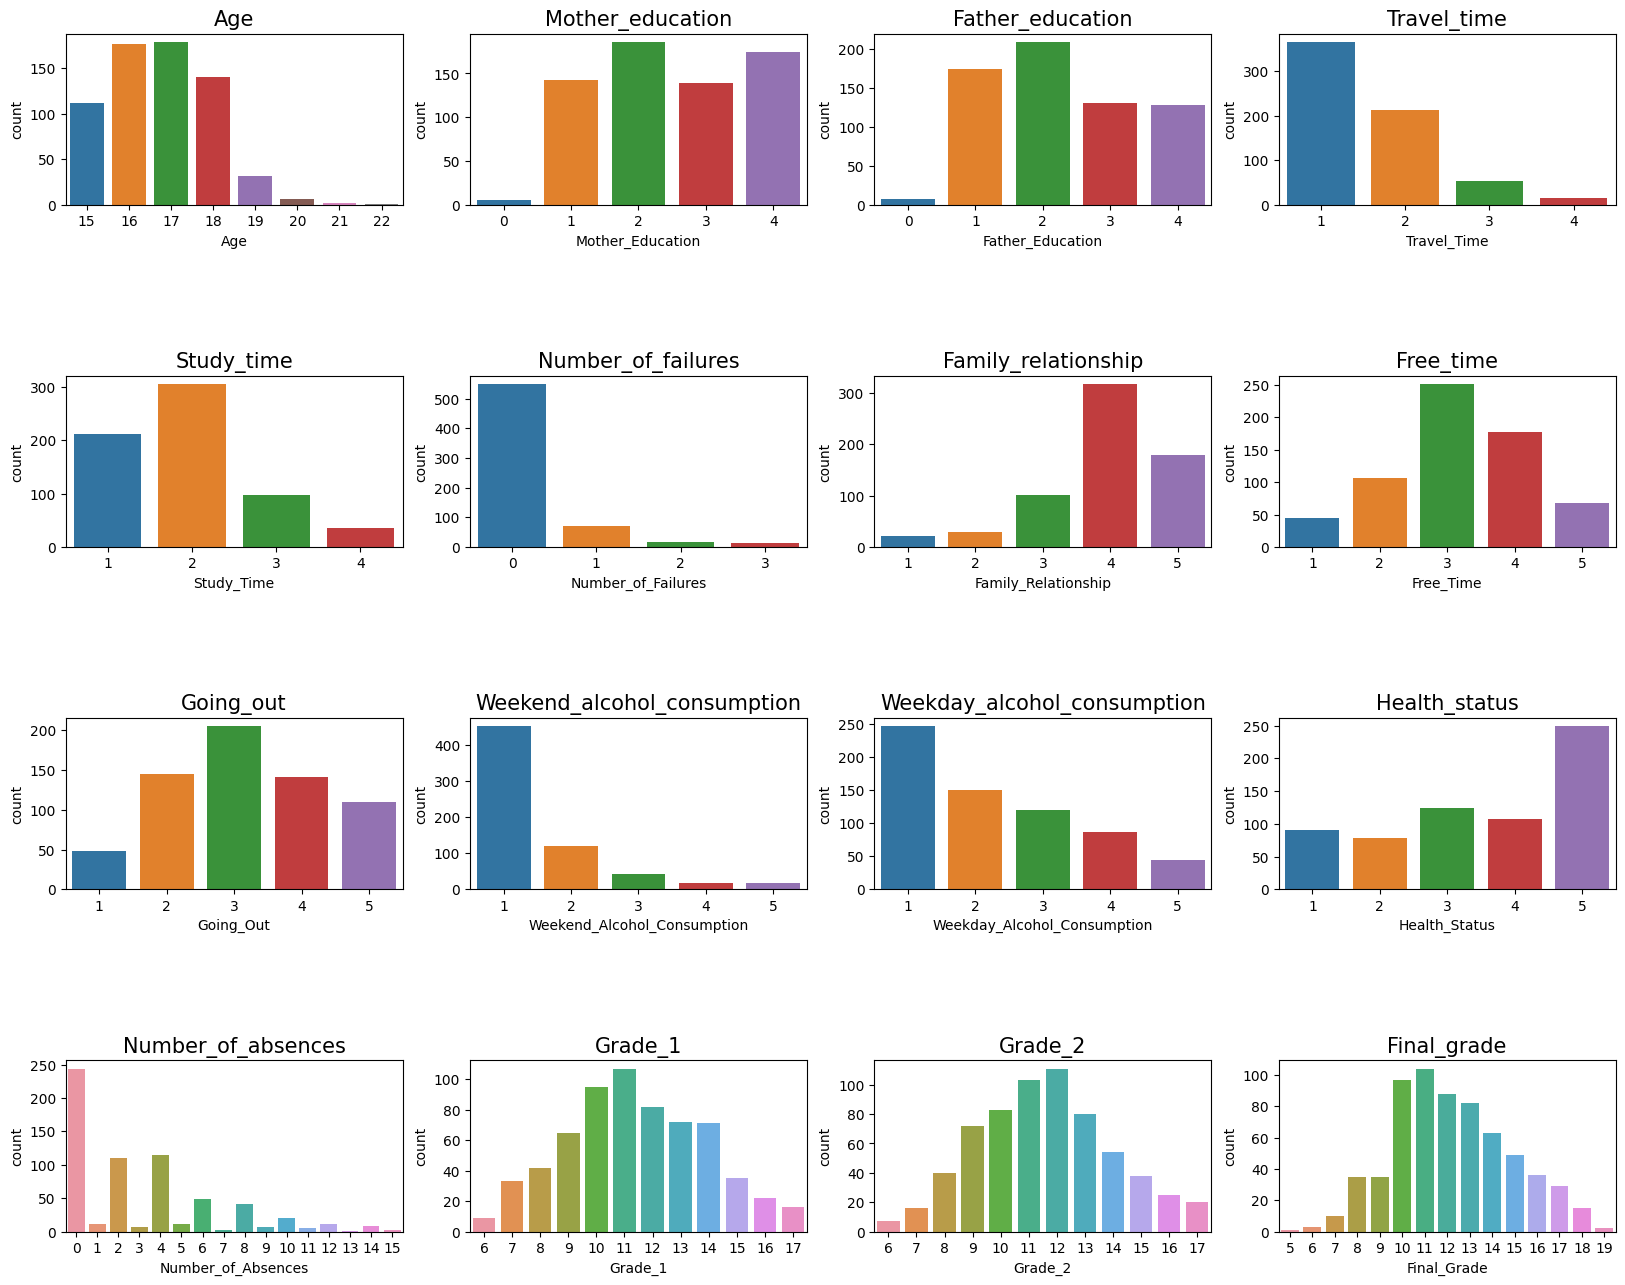

In [18]:
# phân phối các biến numberical
cat_cols = df[['Age', 'Mother_Education', 'Father_Education', 'Travel_Time',
       'Study_Time', 'Number_of_Failures', 'Family_Relationship', 'Free_Time',
       'Going_Out', 'Weekend_Alcohol_Consumption',
       'Weekday_Alcohol_Consumption', 'Health_Status', 'Number_of_Absences',
       'Grade_1', 'Grade_2', 'Final_Grade']]

plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace=1)

for i, col in enumerate(cat_cols, 1):
  plt.subplot(5, 4,i)
  sns.countplot(data = df, x = col)
  plt.title(f'{col.capitalize()}', size = 15)
  plt.xticks()

plt.show()

## Phân tích đa biến (Multivariate Analysis)

In [19]:
df

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,11,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,False
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,False
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9,True
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,False


Text(0.5, 1.0, 'Number of Failures vs Dropped out')

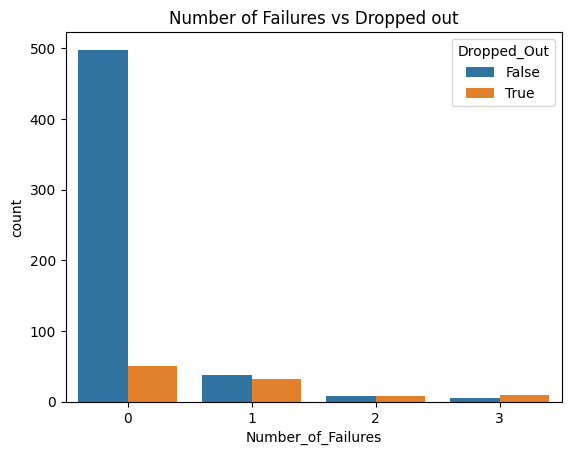

In [20]:
number_of_failures_df = df.groupby(['Number_of_Failures', 'Dropped_Out']).size().reset_index(name='count')
sns.barplot(data=number_of_failures_df, x='Number_of_Failures', y='count', hue='Dropped_Out')
plt.title('Number of Failures vs Dropped out')

Text(0.5, 1.0, 'Number of Failures vs Dropped out')

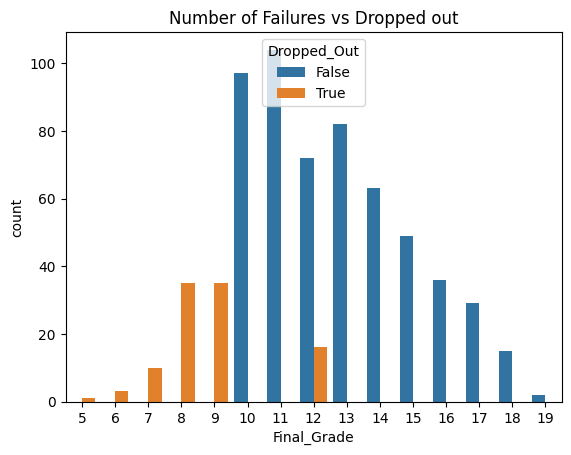

In [21]:
number_of_failures_df = df.groupby(['Final_Grade', 'Dropped_Out']).size().reset_index(name='count')
sns.barplot(data=number_of_failures_df, x='Final_Grade', y='count', hue='Dropped_Out')
plt.title('Number of Failures vs Dropped out')